## Create list of all files

In [3]:
# find all of the files in the directory
import os

flist=[]
for root, dirs, files in os.walk("../data/xeno-canto-dataset/"):
    for file in files:
        if file.endswith(".mp3"):
            flist.append(os.path.join(root, file))
                
print('Found ', len(flist),' files.')

Found  1792  files.


##  Load example file

Selected random files number: [816, 1707, 1501, 302, 584, 1503, 301, 42, 1167, 1609]
865


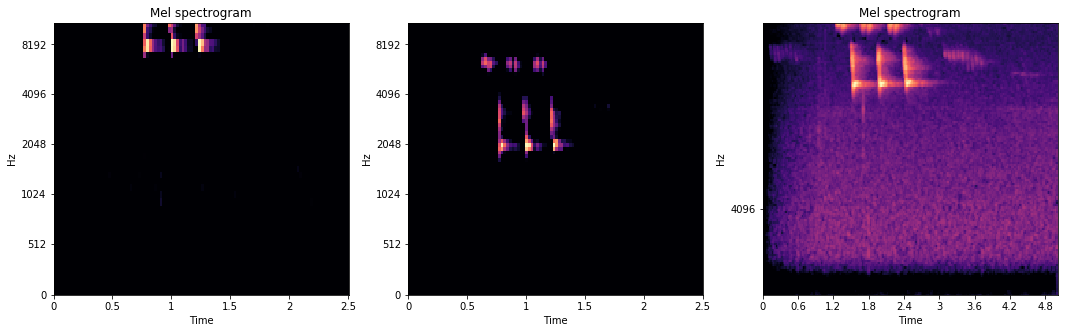

*******************************************


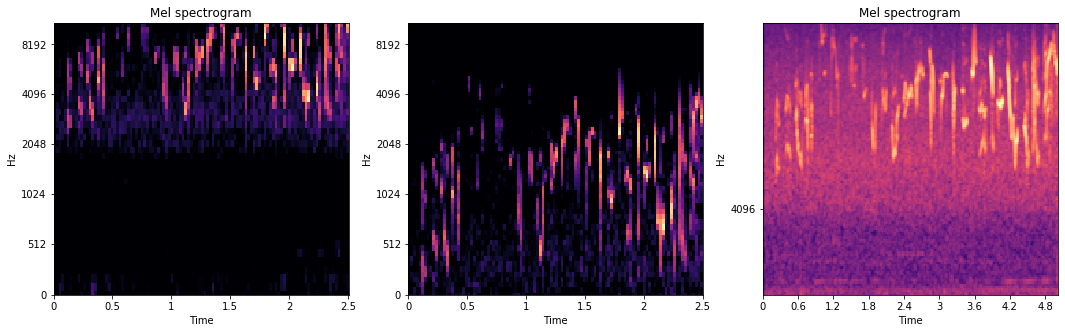

*******************************************


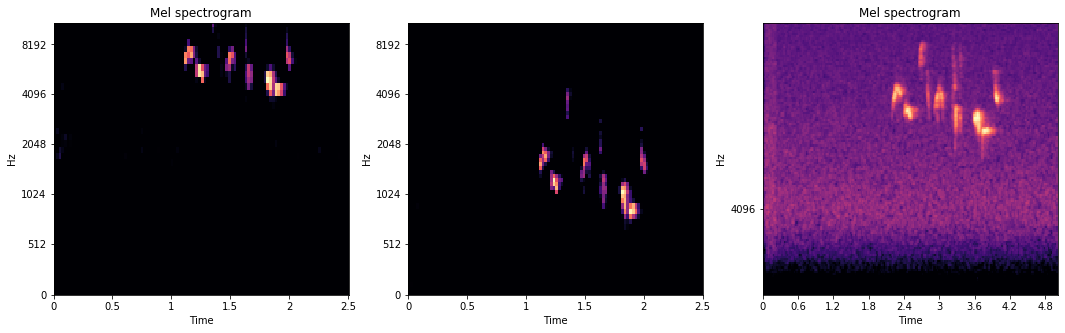

*******************************************


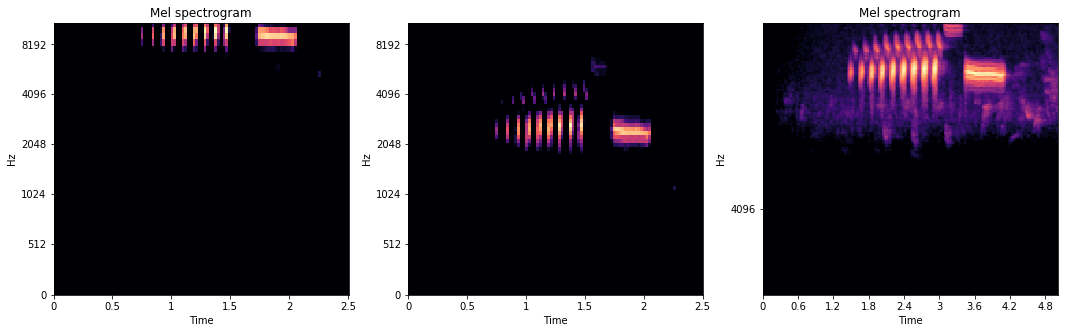

*******************************************


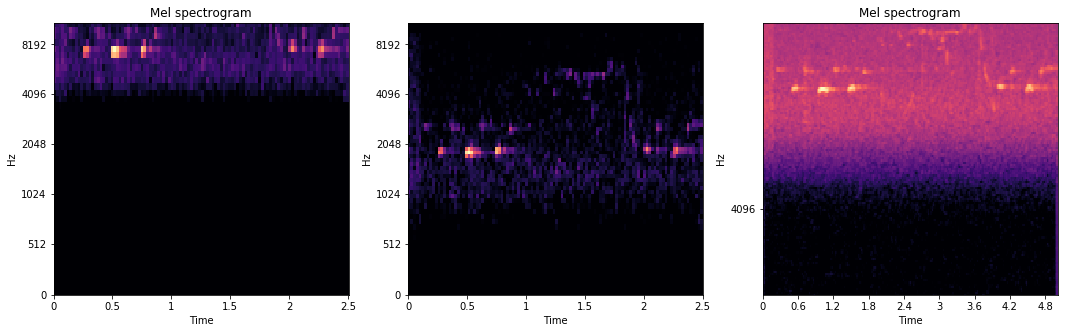

*******************************************


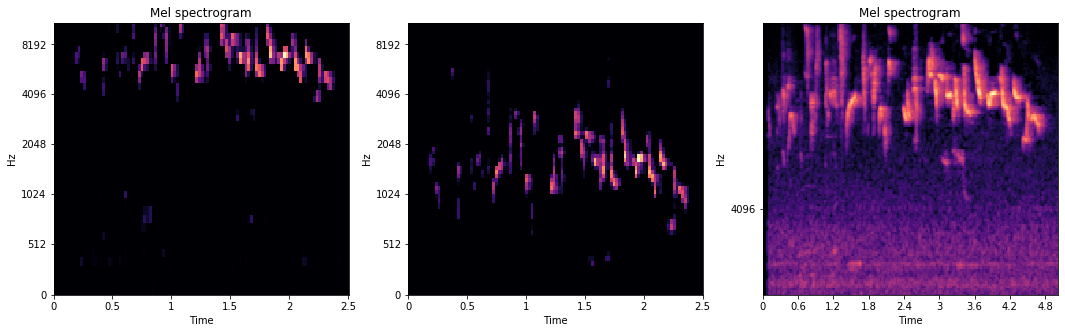

*******************************************


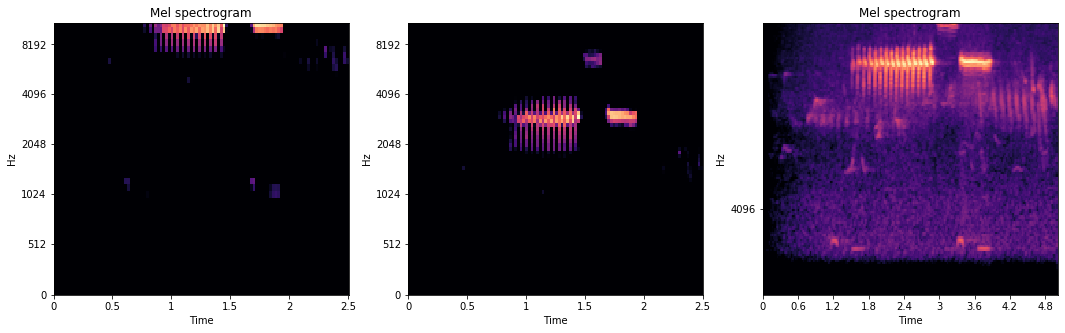

*******************************************


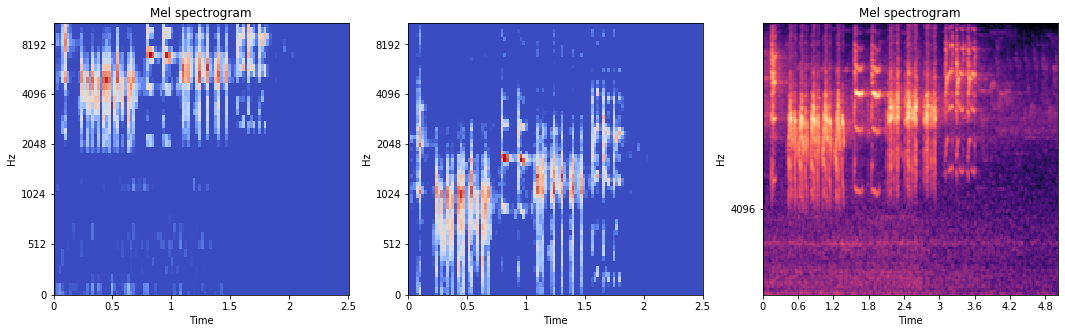

*******************************************


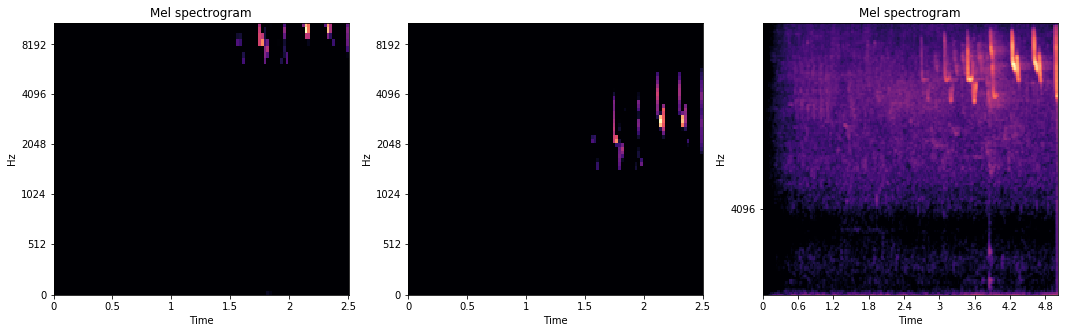

*******************************************


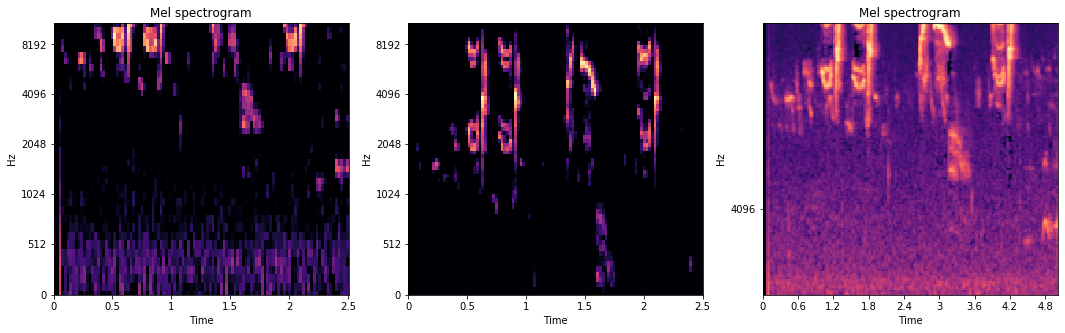

*******************************************


In [37]:
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np
from random import sample

# select random 5 recordings from Poland
randFiles = sample(range(len(flist)), 10)
print('Selected random files number:',randFiles)

print(filePath)

for audioFile in randFiles:
    data, sr = librosa.load(flist[audioFile], duration=5) # sr = sampling rate

    ## Source: MK_spectrogram
    N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
    HOP_SIZE = 1024      # Number of audio frames between STFT columns
    SR = 44100           # Sampling frequency
    N_MELS = 40          # Mel band parameters   
    WIN_SIZE = 1024      # number of samples in each STFT window
    WINDOW_TYPE = 'hann' # the windowin function
    FEATURE = 'mel'      # feature representation

    f, axs = plt.subplots(1,3,figsize=(18,5))
    plt.subplot(1,3,1)
    librosa.display.specshow(
        librosa.core.amplitude_to_db(
            librosa.feature.melspectrogram(
                            y=data, 
                            S=np.abs(
                                librosa.stft(
                                    data, n_fft = N_FFT, 
                                    hop_length = HOP_SIZE, 
                                    window = WINDOW_TYPE, 
                                    win_length = WIN_SIZE)
                                    )**2, 
                            sr=SR, 
                            n_fft=N_FFT, 
                            hop_length=HOP_SIZE, 
                            n_mels=N_MELS, 
                            htk=True, 
                            fmin=0.0, 
                            fmax=sr/2.0), 
                ref=1.0),
            sr=SR,
            hop_length=HOP_SIZE, 
            x_axis='time', 
            y_axis='mel')

    plt.title('Mel spectrogram')


    # MK_spectrogram modified
    N_FFT = 1024         # 
    HOP_SIZE = 1024      # 
    SR = 44100           # 
    N_MELS = 64          # Higher   
    WIN_SIZE = 1024      # 
    WINDOW_TYPE = 'hann' # 
    FEATURE = 'mel'      # 
    
    plt.subplot(1,3,2)
    librosa.display.specshow(
                librosa.core.amplitude_to_db(
                    librosa.feature.melspectrogram(
                                    y=data, 
                                    S=np.abs(
                                        librosa.stft(
                                            data, n_fft = N_FFT, 
                                            hop_length = HOP_SIZE, 
                                            window = WINDOW_TYPE, 
                                            win_length = WIN_SIZE)
                                            )**2, 
                                    sr=SR, 
                                    n_fft=N_FFT, 
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=2500.0, # higher limit
                                    fmax=sr), # higher limit
                        ref=1.0),
                    sr=SR,
                    hop_length=HOP_SIZE, 
                    x_axis='time', 
                    y_axis='mel')

    plt.subplot(1,3,3)
    
    # Source: AM_analyzeDataset
    S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                              y_axis='mel', fmin = 3000, fmax=8000,x_axis='time')
    plt.title('Mel spectrogram')
    plt.show()
    print('*******************************************')